In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt


In [6]:
plt.rcParams['figure.figsize'] = [15, 10] 

In [3]:
raw_expre = pd.read_csv('datasets/GSE121239/GSE121239/raw_expre.csv', sep=",")  
raw_expre 

,Unnamed: 0,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
0,1007_PM_s_at,4.955257,4.870351,4.889382,4.956931,4.518659,4.039076,4.363994,4.474612,4.109501,...,4.143518,4.163726,3.552997,4.688624,4.101748,3.987773,4.674258,4.855265,5.227129,5.702039
1,1053_PM_at,5.984784,6.119432,5.914195,5.887814,5.962590,6.213503,6.523682,6.630676,6.424815,...,5.601486,5.307239,5.585876,6.538760,6.420332,5.949633,5.587069,6.032248,6.317659,6.449117
2,117_PM_at,9.477945,9.828793,9.719707,9.148228,9.378308,9.688581,8.985668,10.329326,8.890190,...,9.077410,9.349135,9.554533,9.941707,10.278584,9.672171,8.650779,9.264324,9.430051,9.660996
3,121_PM_at,4.553229,4.487615,4.645168,4.681996,4.990632,4.762670,4.528352,4.693206,3.875943,...,5.177162,4.961182,5.267552,4.404966,4.013917,4.234865,4.418242,4.269110,4.115500,4.135403
4,1255_PM_g_at,1.921190,2.169639,2.410481,1.885852,1.987256,2.029976,2.110129,2.136902,2.169476,...,2.224418,2.158327,2.316911,1.942149,1.929420,1.862300,1.842566,2.258901,1.951895,1.896087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,AFFX-ThrX-5_at,2.365662,2.344025,2.537787,2.140112,2.381164,8.440270,8.646316,8.013230,8.402119,...,2.192767,2.476008,2.580959,2.440795,2.469701,2.252614,3.157310,2.106090,2.005743,2.026090
54711,AFFX-ThrX-M_at,2.277690,2.480338,2.475397,2.749770,2.593526,9.183744,9.454726,8.446197,9.143964,...,2.639253,2.443756,2.271883,2.293643,2.424896,2.411526,2.435952,2.237814,2.377712,2.230381
54712,AFFX-TrpnX-3_at,1.897895,1.632143,1.534480,1.484037,1.949685,1.589518,1.552478,1.641031,1.505580,...,1.738948,1.855197,1.884866,1.881311,1.598604,1.661921,1.836948,1.777169,1.550851,1.626575
54713,AFFX-TrpnX-5_at,2.335483,2.280212,2.479271,2.404451,2.560628,2.382748,2.314126,2.433191,2.334751,...,2.822136,2.517637,2.529161,2.802461,2.411997,2.470162,2.490672,2.299285,2.253745,2.420385


In [4]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212418_PM_at', '212420_PM_at'],
            'IRF1': ['202531_PM_at', '238725_PM_at'], 
            'SYNGR1': ['204287_PM_at', '213854_PM_at', '210613_PM_s_at'] 
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][0] 
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0] 

## Gene Plots (for ELF1 / IRF1 / SYNGR1)

<AxesSubplot:>

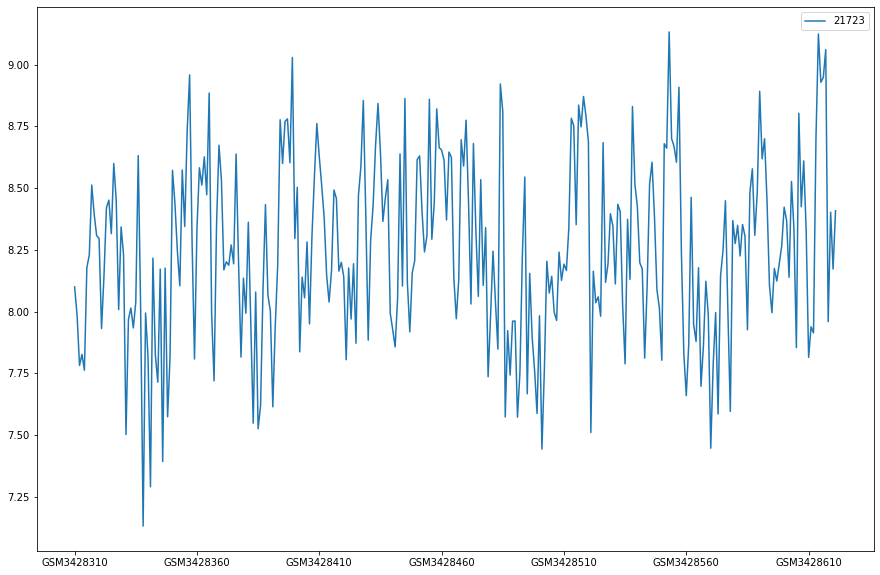

In [7]:
"""
ELF1 
"""

raw_expre[raw_expre['Unnamed: 0']==elf1].T.drop(['Unnamed: 0']).plot() 

<AxesSubplot:>

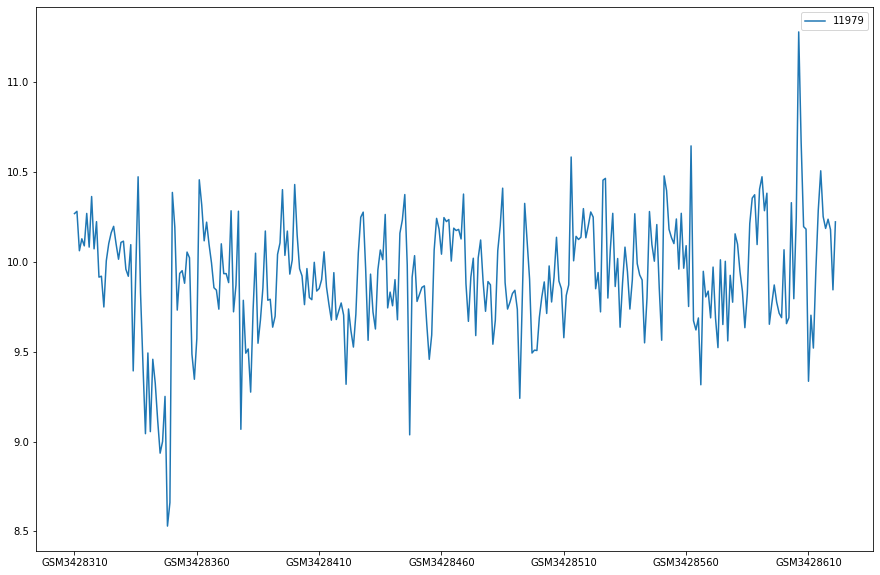

In [8]:
"""
IRF1  
"""

raw_expre[raw_expre['Unnamed: 0']==irf1].T.drop(['Unnamed: 0']).plot() 

<AxesSubplot:>

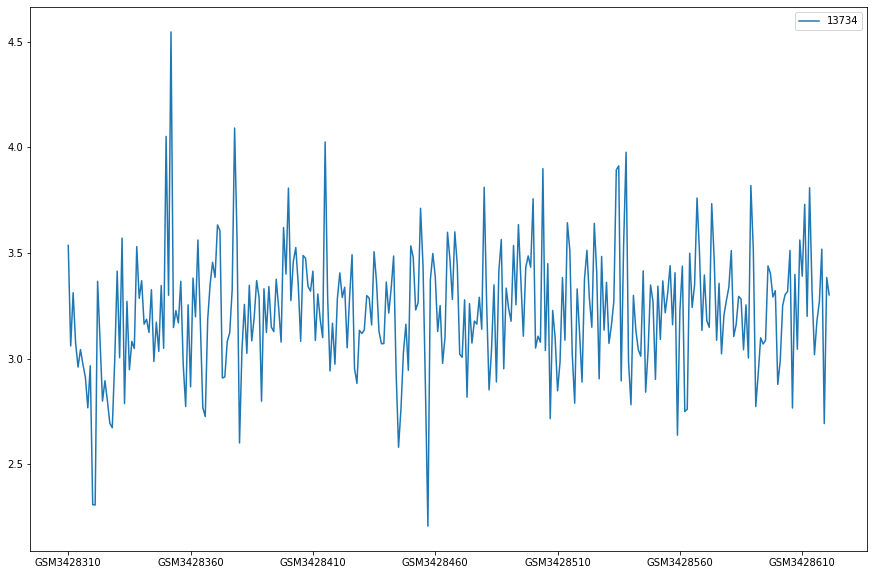

In [9]:
"""
SYNGR1  
"""

raw_expre[raw_expre['Unnamed: 0']==syngr1].T.drop(['Unnamed: 0']).plot() 

## Distribution of Data 

#### Means of genes vs number of genes with that mean. Or a histogram of means of genes for all samples. 

<AxesSubplot:>

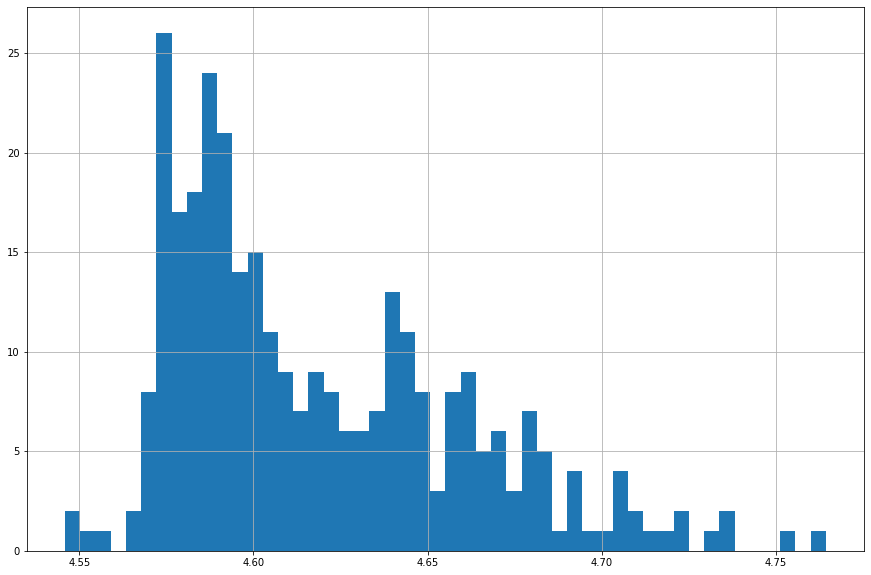

In [10]:
raw_expre.T.drop(['Unnamed: 0']).T.mean().hist(bins=50) 

## Coefficient of variation Plot 

In [11]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
raw_expre['CV'] = raw_expre.apply(lambda row : cv(row.T.drop(['Unnamed: 0'])), axis = 1) 

<AxesSubplot:>

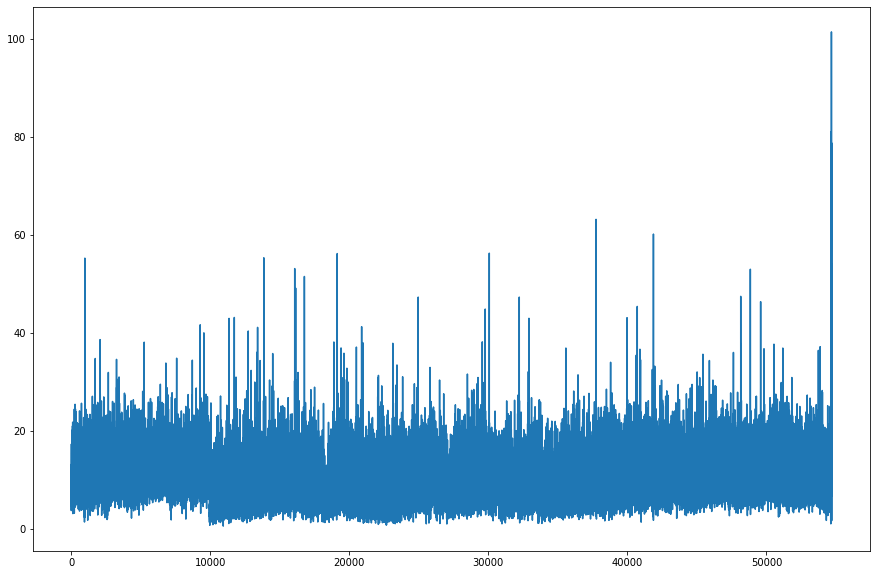

In [12]:
raw_expre['CV'].plot()

#### Min coefficient of variation 

In [13]:
raw_expre['CV'].min()

0.6700409311555023

#### Max coefficient of variation 

In [14]:
raw_expre['CV'].max()

101.36865186910569

#### Coefficient of variation less than 1 

In [15]:
raw_expre[raw_expre['CV']<1] 

,Unnamed: 0,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,...,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621,CV
9972,200031_PM_s_at,12.743698,12.723494,12.740703,12.708090,12.768750,12.742374,12.728497,12.682840,12.733810,...,12.859761,12.539315,12.605418,12.691460,12.854068,12.805795,12.589401,12.755111,12.683114,0.826490
10196,200748_PM_s_at,12.765602,12.781554,12.845527,12.672477,12.744052,12.612758,12.584255,12.761328,12.631452,...,12.804183,12.798274,12.827596,12.839459,12.607702,12.453852,12.482060,12.567841,12.607481,0.960344
10940,201492_PM_s_at,12.519562,12.600981,12.518058,12.560721,12.452489,12.624000,12.583917,12.494613,12.595958,...,12.600512,12.569835,12.485699,12.508232,12.582393,12.763098,12.609971,12.659742,12.583998,0.670041
22651,213350_PM_at,12.347313,12.378616,12.308914,12.430671,12.287590,12.373232,12.366940,12.128428,12.343729,...,12.519583,12.374885,12.498369,12.299724,12.411400,12.507320,12.438849,12.261441,12.269833,0.917850
22678,213377_PM_x_at,12.582775,12.542603,12.617962,12.559499,12.598909,12.544166,12.616064,12.599293,12.553903,...,12.277723,12.198566,12.471668,12.298256,12.471564,12.578245,12.467244,12.431956,12.395443,0.905786


#### Coefficient of variation of ELF1 / IRF1 / SYNGR1 

In [16]:
raw_expre[raw_expre['Unnamed: 0']==elf1]['CV'] 

21723    4.406498
Name: CV, dtype: float64

In [17]:
raw_expre[raw_expre['Unnamed: 0']==irf1]['CV']

11979    3.317422
Name: CV, dtype: float64

In [18]:
raw_expre[raw_expre['Unnamed: 0']==syngr1]['CV']

13734    9.115219
Name: CV, dtype: float64